First: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

Second: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

Third: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

So, here is the deliverable: Prepare a slide deck and 15 minute presentation that guides viewers through your model. Be sure to cover a few specific things:

A specified research question your model addresses

How you chose your model specification and what alternatives you compared it to

The practical uses of your model for an audience of interest

Any weak points or shortcomings of your model
*****
FROM KAGGLE
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.



Question:  With the available black friday sales data, can we predict the the amount of purchase?

Answer: As long as the purchase price falls within the range $185 - $23961 (the range of the model dataset), the purchase price can be predicted within +- $15.67

In [143]:
import datetime, warnings, scipy 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import ConnectionPatch
from collections import OrderedDict
from matplotlib.gridspec import GridSpec
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from scipy.optimize import curve_fit
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"
pd.options.display.max_columns = 50
%matplotlib inline
warnings.filterwarnings("ignore")

In [144]:
df1 = pd.read_csv('BlackFriday.csv', low_memory=False)
print('Dataframe dimensions:', df1.shape)


Dataframe dimensions: (537577, 12)


In [145]:


df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [146]:
df1.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


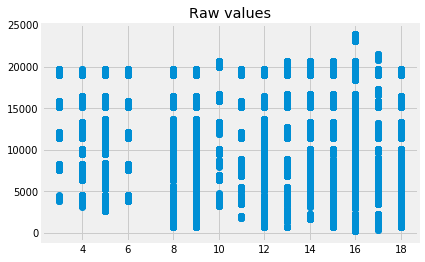

In [147]:
# Sample data.
outcome = df1['Product_Category_3']
feature = df1['Purchase']

# Plot the data as-is. Looks a mite quadratic.
plt.scatter(outcome, feature)
plt.title('Raw values')
plt.show()



In [148]:
# gives some infos on columns types and number of null values
datainfo=pd.DataFrame(df1.dtypes).T.rename(index={0:'column type'})
datainfo=datainfo.append(pd.DataFrame(df1.isnull().sum()).T.rename(index={0:'null values (nb)'}))
datainfo=datainfo.append(pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
datainfo

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
column type,int64,object,object,object,int64,object,object,int64,int64,float64,float64,int64
null values (nb),0,0,0,0,0,0,0,0,0,166986,373299,0
null values (%),0,0,0,0,0,0,0,0,0,31.0627,69.441,0


1.  31% of 'Product_Category_2' has null values, These null values will be replaced with '0'.
2.  69% of 'Product_Category_3' has null values, These null values will be replaced with '0'.


# EDA

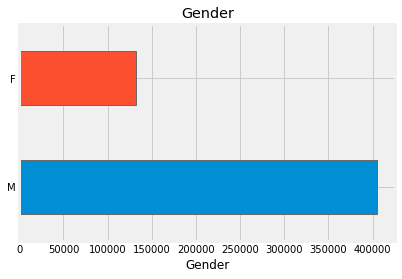

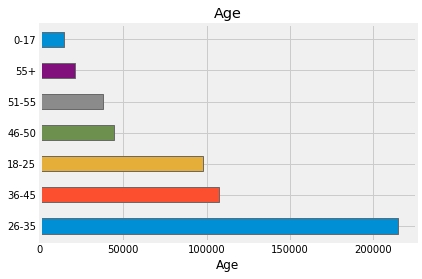

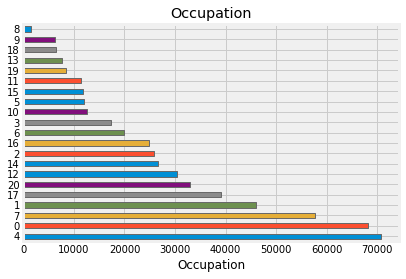

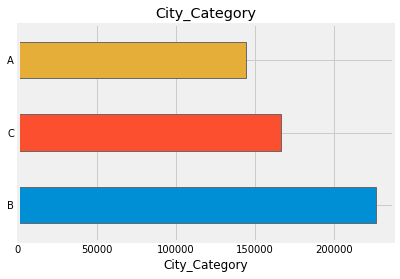

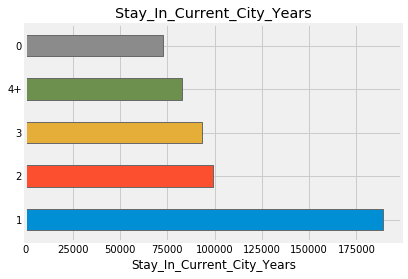

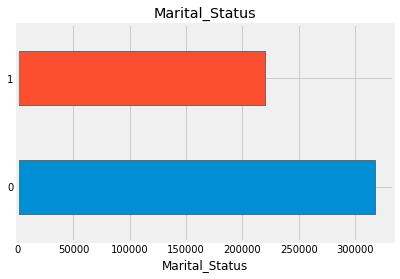

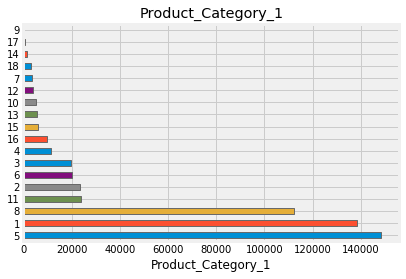

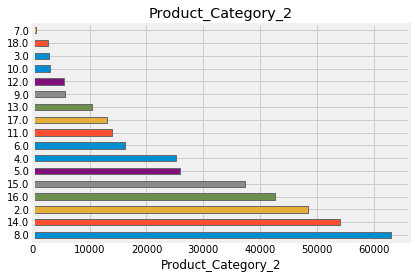

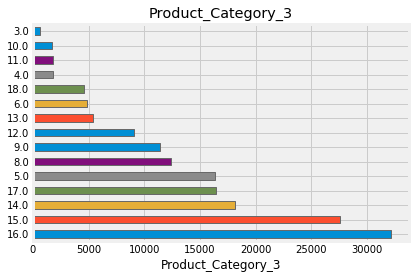

In [149]:
#show feature value counts
collist = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
          'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for col in collist:
    df1[col].value_counts().plot(kind='barh', label=col, subplots=True)
    plt.xlabel(col)
    plt.show()
#for ProductID there are 3623 individual products
#for User_ID there are 5891 different users

1.  Males shoppers outnumber female shoppers almost 3:1
2.  There are 7 Age classes with the 26-35 class containing the majority of the shoppers
3.  There are 21 Occupation classes, with the 0, 1, 4, 7 classes having the majority of the shoppers.
4.  We have 3 different classes of City_Category.
5.  Stay_in_Current_City_Years is divided into 5 classes, the '1' year class holds the majority of the shoppers.
6.  Marital_Status is binary, I'll assume '1' is married, '0' is unmarried (although there is no certainty here).
7.  The Product_Category_1 feature contains 18 classes, all rows contained values for this feature, classes 1, 5, 8 contain the majority of the purchases.
8.  The Product_Category_2 feature contains 17 classes, and an 18th '0' class will be added to accomodate the null values.
9.  The Product_Category_2 feature contains 15 classes, and an 16th '0' class will be added to accomodate the null values.

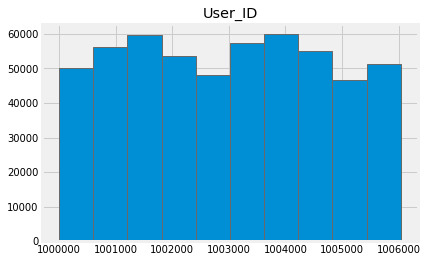

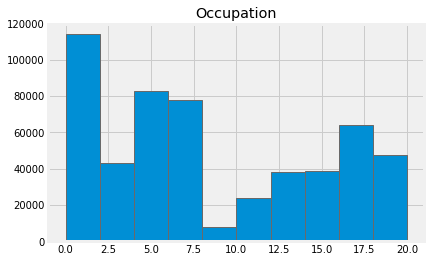

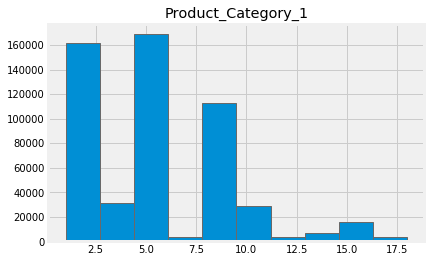

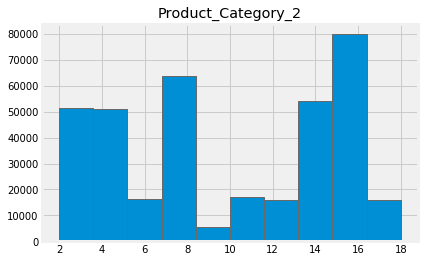

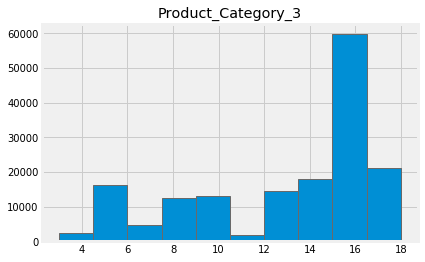

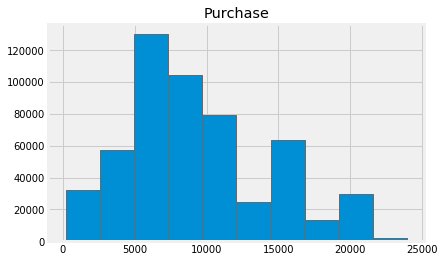

In [150]:
columnsofvalue = ['User_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2',
                  'Product_Category_3', 'Purchase']
for col in columnsofvalue:
    df1.hist(column=[col])
    plt.show()

In [151]:
#trying to normalize my dependent feature with log
Purchaselog = np.log(df1.Purchase)

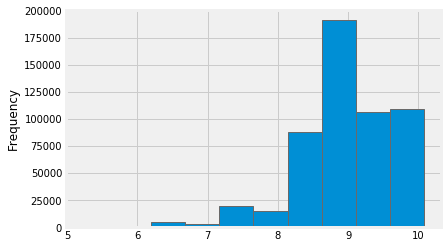

In [152]:
#Log transform won't do it
Purchaselog.plot(kind='hist')
plt.show()

In [153]:
#Attempt to normalize dependent feature sqrt
Purchasesq = np.sqrt(df1.Purchase)

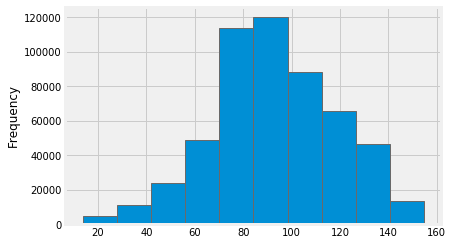

In [154]:
#This works
Purchasesq.plot(kind='hist')
plt.show()

In [155]:
df1['Purchase'] = np.sqrt(df1.Purchase)

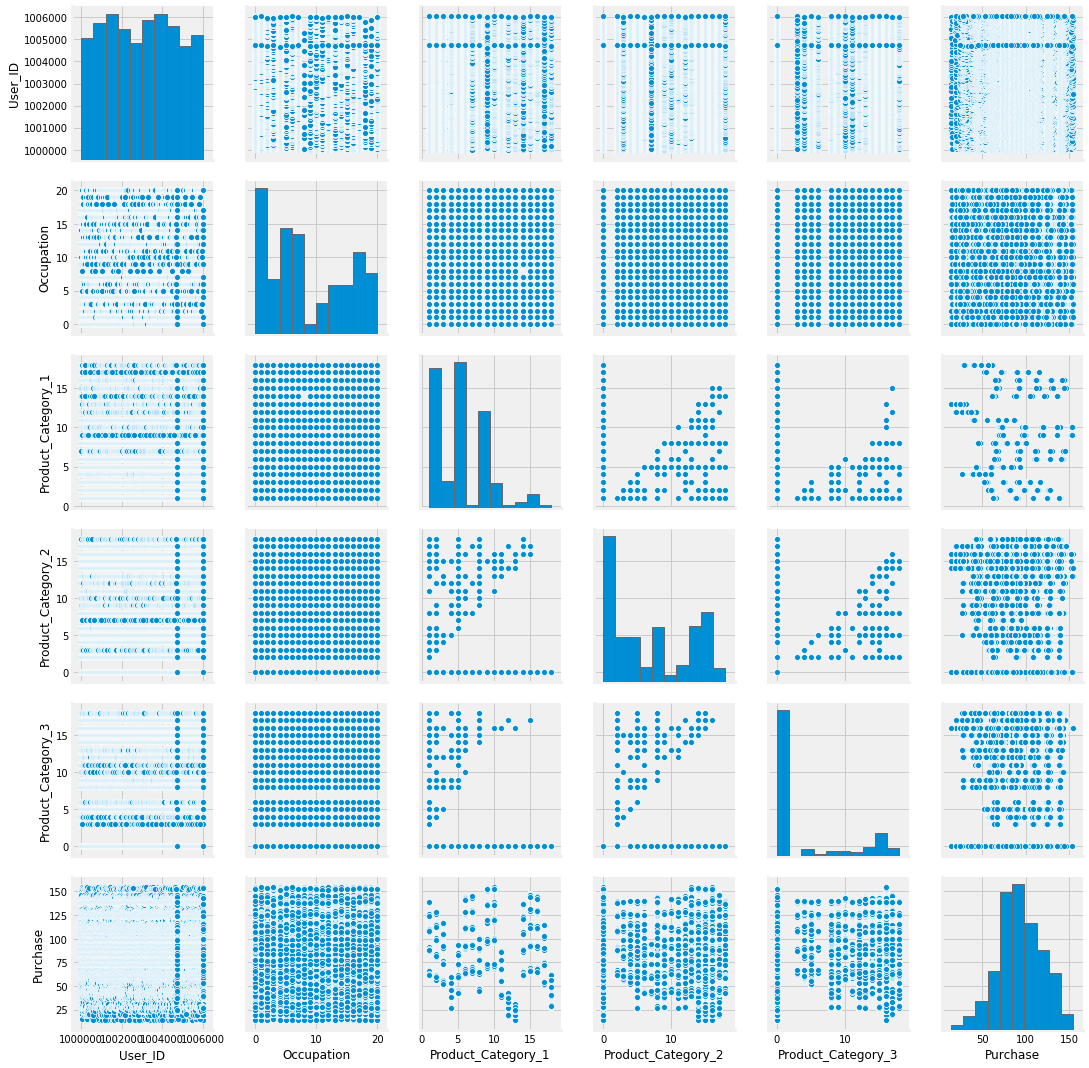

In [37]:
sns.pairplot(df1[columnsofvalue])

In [156]:
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,91.487704
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,123.288280
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,37.709415
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,32.511536
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,89.269256


In [157]:
df1 = df1.fillna(0)

In [158]:
# gives some infos on columns types and number of null values
datainfo=pd.DataFrame(df1.dtypes).T.rename(index={0:'column type'})
datainfo=datainfo.append(pd.DataFrame(df1.isnull().sum()).T.rename(index={0:'null values (nb)'}))
datainfo=datainfo.append(pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
datainfo

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
column type,int64,object,object,object,int64,object,object,int64,int64,float64,float64,float64
null values (nb),0,0,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,0,0


                     User_ID  Occupation  Marital_Status  Product_Category_1  \
User_ID             1.000000   -0.023024        0.018732            0.003687   
Occupation         -0.023024    1.000000        0.024691           -0.008114   
Marital_Status      0.018732    0.024691        1.000000            0.020546   
Product_Category_1  0.003687   -0.008114        0.020546            1.000000   
Product_Category_2  0.003663    0.006792        0.001146           -0.040730   
Product_Category_3  0.003938    0.011941       -0.004363           -0.389048   
Purchase            0.004252    0.019991        0.000219           -0.336612   

                    Product_Category_2  Product_Category_3  Purchase  
User_ID                       0.003663            0.003938  0.004252  
Occupation                    0.006792            0.011941  0.019991  
Marital_Status                0.001146           -0.004363  0.000219  
Product_Category_1           -0.040730           -0.389048 -0.336612  
Prod

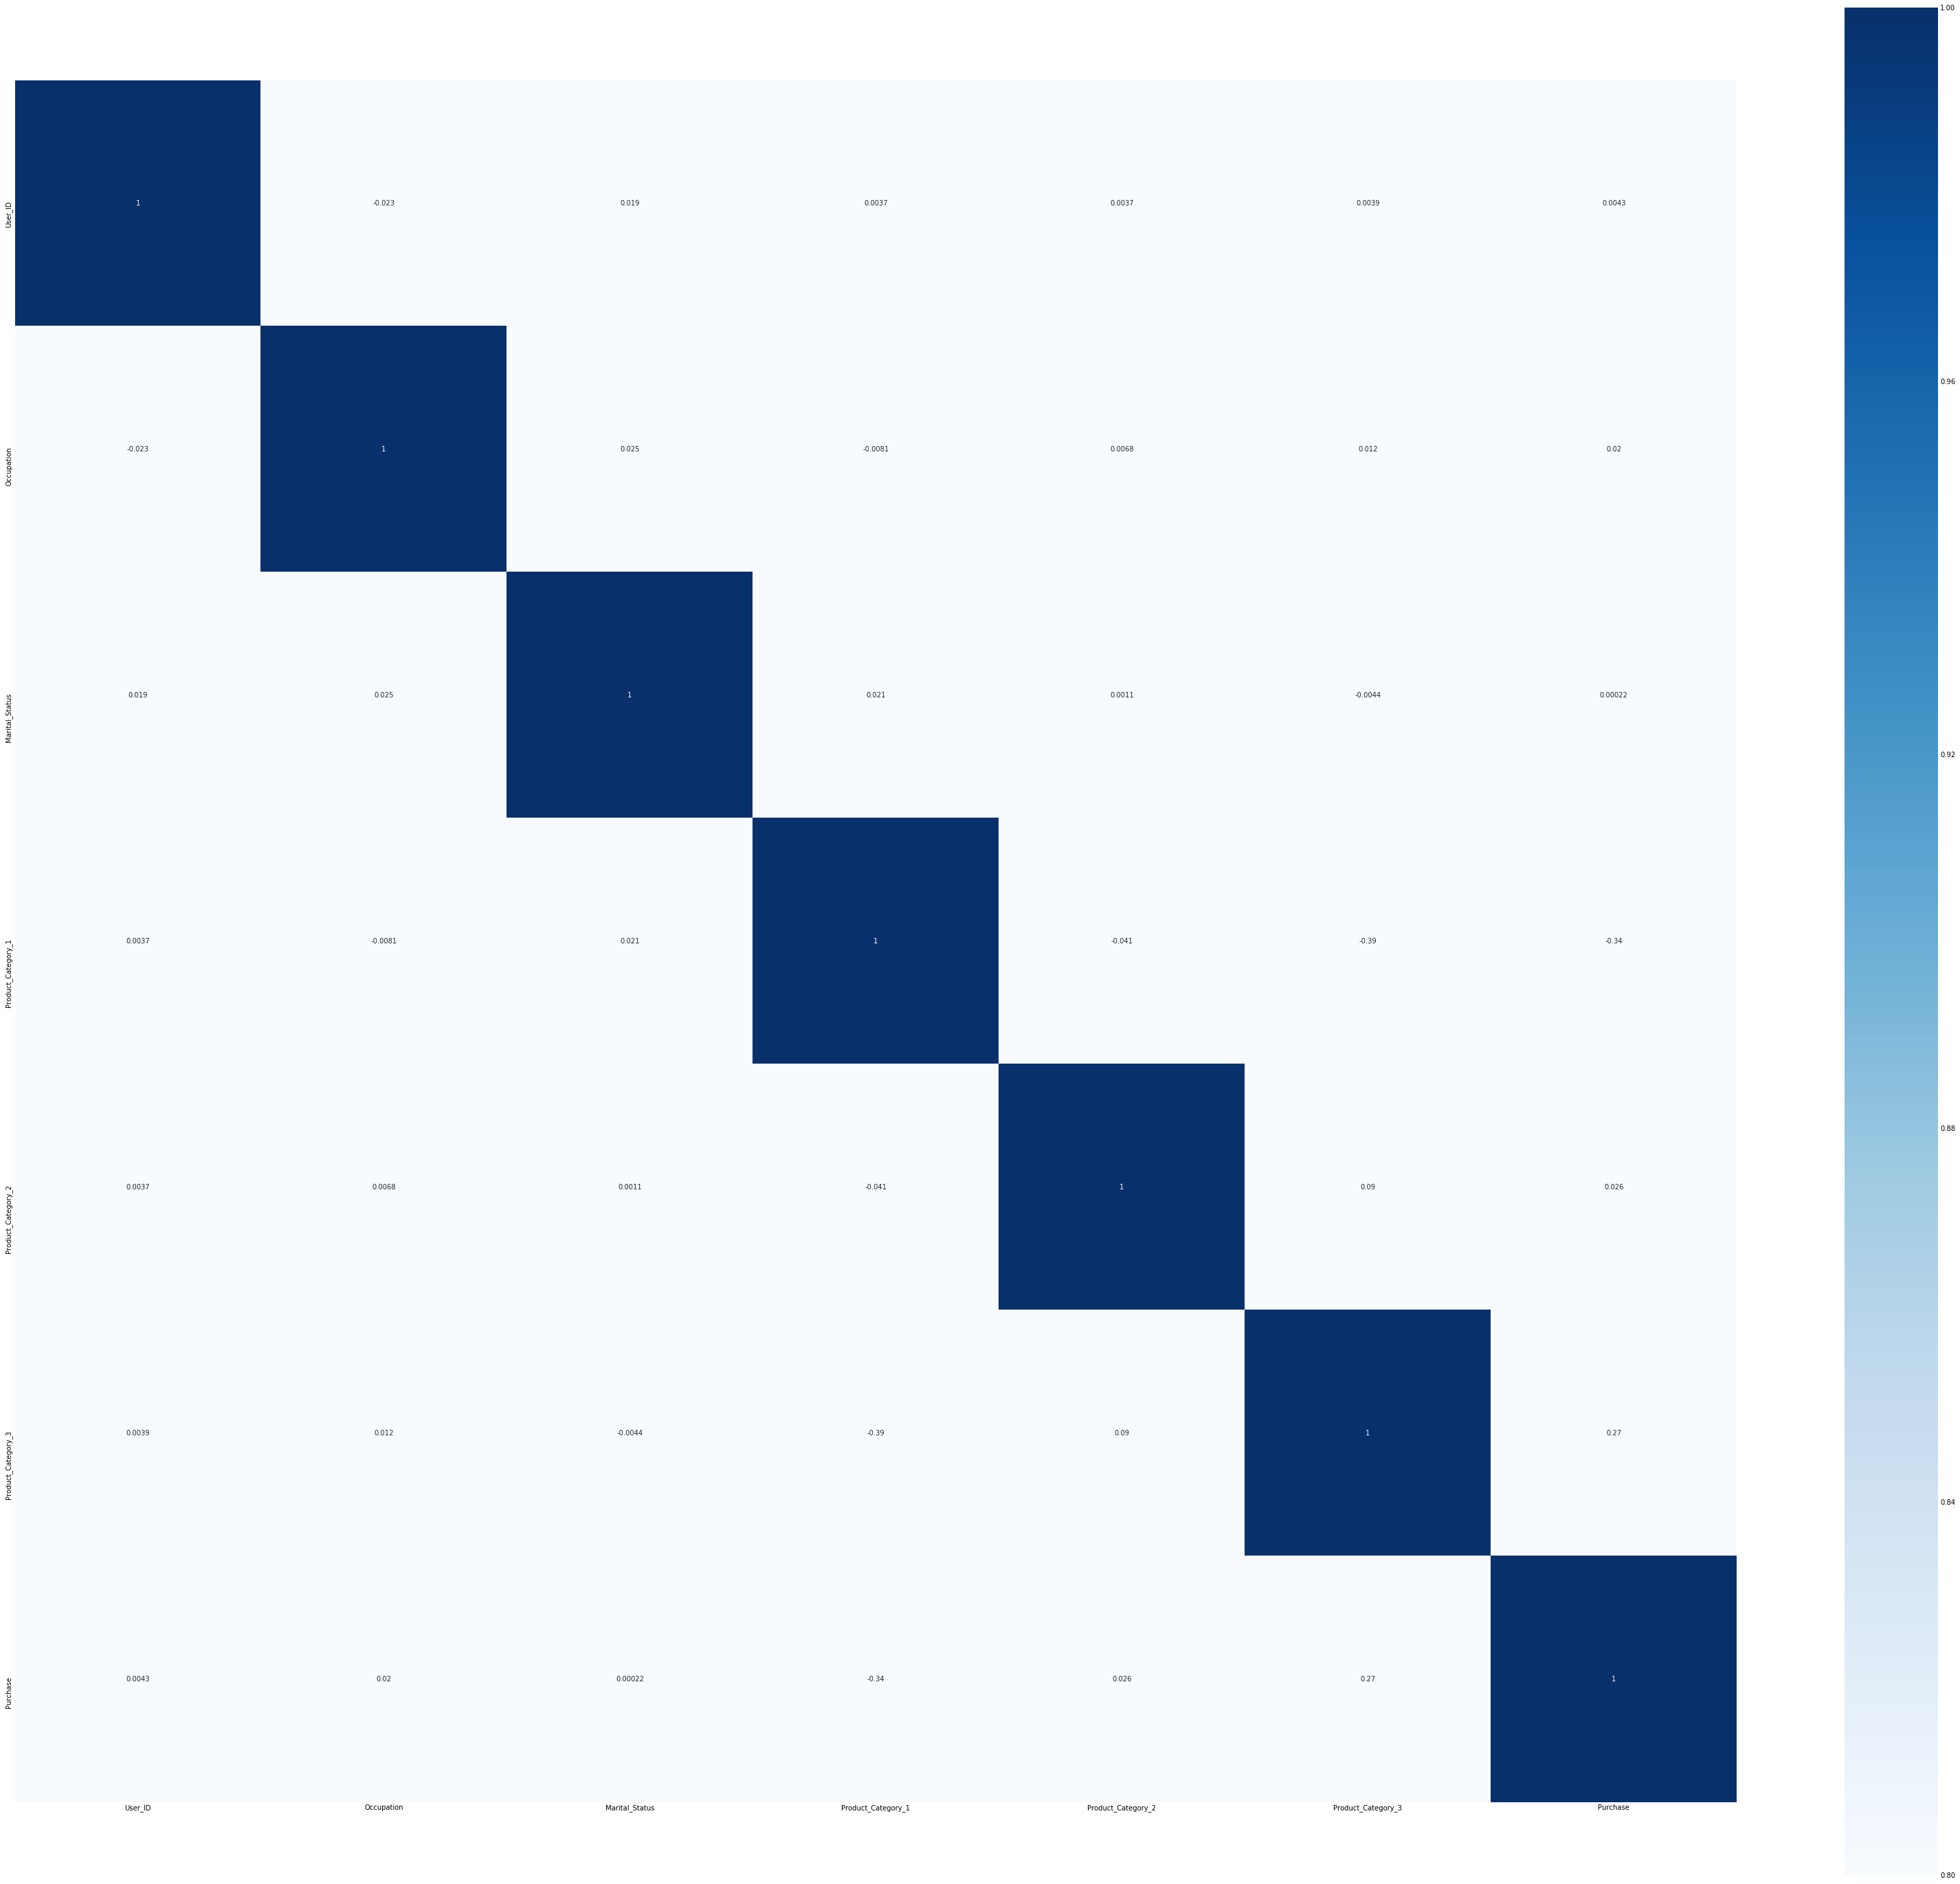

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023024,0.018732,0.003687,0.003663,0.003938,0.004252
Occupation,-0.023024,1.000000,0.024691,-0.008114,0.006792,0.011941,0.019991
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.001146,-0.004363,0.000219
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,-0.040730,-0.389048,-0.336612
Product_Category_2,0.003663,0.006792,0.001146,-0.040730,1.000000,0.090284,0.026305
Product_Category_3,0.003938,0.011941,-0.004363,-0.389048,0.090284,1.000000,0.272319
Purchase,0.004252,0.019991,0.000219,-0.336612,0.026305,0.272319,1.000000


In [159]:
corrmat = df1.corr()
print(corrmat)
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(50, 50))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmin=.8, square=True, cmap="Blues", annot=True)
plt.show()
df1.corr()

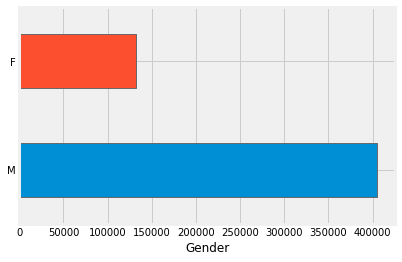

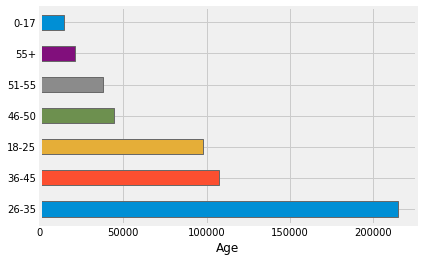

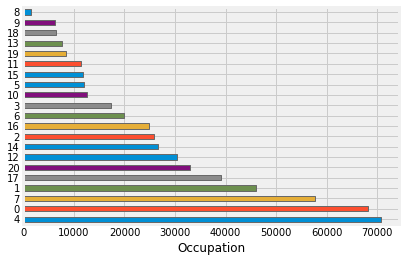

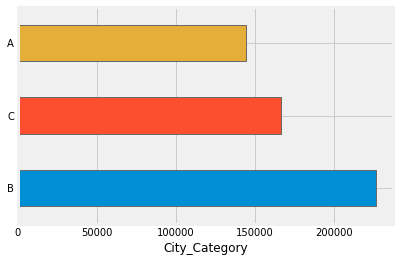

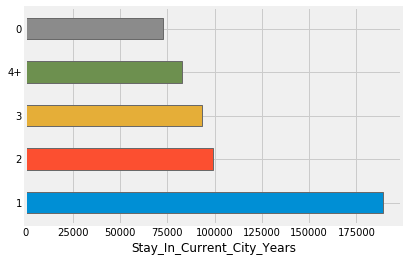

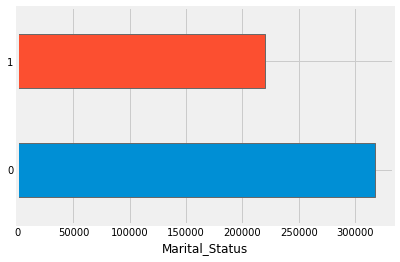

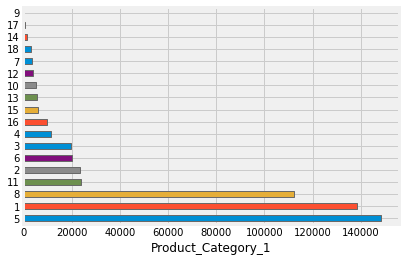

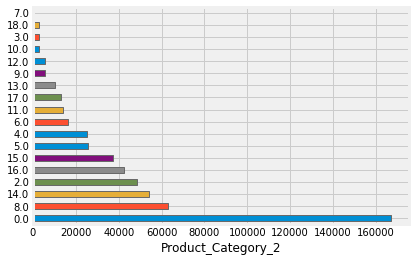

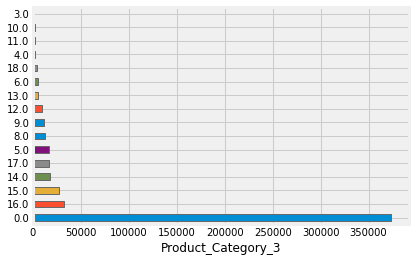

In [160]:
#show feature value counts
collist = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
          'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
for col in collist:
    df1[col].value_counts().plot(kind='barh', label=col)
    plt.xlabel(col)
    plt.show()
#for ProductID there are 3623 individual products
#for User_ID there are 5891 different users

In [161]:
X = df1.drop(['Purchase', 'Product_ID', 'Marital_Status', 'Occupation', 'User_ID',], axis=1)
X = pd.get_dummies(data=X, columns=['Product_Category_1','Product_Category_2','Product_Category_3',
                                    'Stay_In_Current_City_Years', 'City_Category', 'Gender', 'Age'])
y = df1['Purchase']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [163]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [164]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [165]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [166]:
y_pred


array([84.86984882, 98.62343003, 83.42860581, ..., 36.63954331,
       85.09218003, 86.31483628])

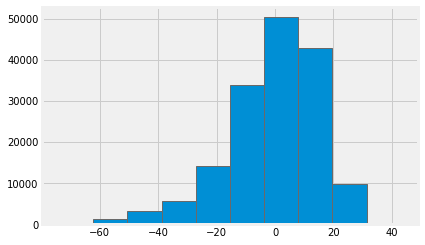

In [167]:
(y_test - y_pred).hist()

In [168]:
print(reg.coef_)
print(reg.intercept_)
print('Train Score :', reg.score(X_train, y_train))
print('Test Score:', reg.score(X_test, y_test))


[-8.79831180e+10 -4.12213936e+10 -3.80756625e+10 -2.91983582e+10
 -9.00160219e+10 -3.82896923e+10 -1.66001125e+10 -8.18200984e+10
 -5.57714318e+09 -1.94863361e+10 -4.15263611e+10 -1.69827595e+10
 -2.02359689e+10 -1.06046912e+10 -2.15472336e+10 -2.66625385e+10
 -6.43632241e+09 -1.51425508e+10 -1.82511410e+12 -1.12968778e+12
 -2.87566407e+11 -8.36397892e+11 -8.43442003e+11 -6.78032262e+11
 -1.30976997e+11 -1.27142688e+12 -3.97821166e+11 -2.94110533e+11
 -6.25918147e+11 -3.90257535e+11 -5.43872559e+11 -1.18643907e+12
 -1.00531905e+12 -1.06772767e+12 -6.09890039e+11 -2.79697260e+11
 -4.19560178e+12 -3.06481026e+11 -5.37203606e+11 -1.57001269e+12
 -8.54973327e+11 -1.37062648e+12 -1.31347305e+12 -5.15594564e+11
 -5.27756377e+11 -1.17290244e+12 -9.01237179e+11 -1.64199098e+12
 -2.00985493e+12 -2.15978388e+12 -1.56764072e+12 -8.37844622e+11
 -3.69893576e+12 -5.16748420e+12 -4.20079722e+12 -4.10144766e+12
 -3.90166197e+12 -3.21558815e+13 -3.57757531e+13 -3.35005281e+13
  2.40434919e+13  2.40434

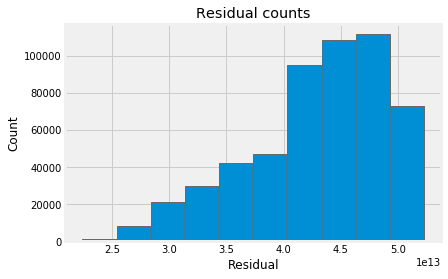

In [169]:
# Extract predicted values.
predicted = reg.predict(X).ravel()
actual = df1['Purchase']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

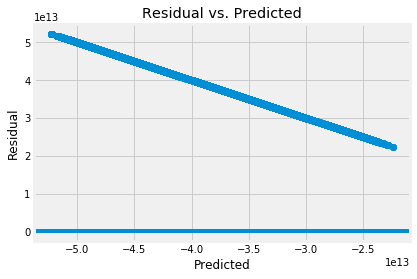

In [170]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg, X, y, cv=10)

array([0.64320138, 0.64625451, 0.65017134, 0.64628191, 0.6495634 ,
       0.648314  , 0.64866299, 0.65198588, 0.64575868, 0.64494821])

In [33]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE : 245.69280811643094
RMSE : 15.674591162656554


In [37]:
reg.score(X_test,y_test)

0.6471000250402904

In [38]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.6471000797209678


In [39]:
X.head()

,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_2_0.0,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,Product_Category_2_6.0,Product_Category_2_7.0,...,Product_Category_3_11.0,Product_Category_3_12.0,Product_Category_3_13.0,Product_Category_3_14.0,Product_Category_3_15.0,Product_Category_3_16.0,Product_Category_3_17.0,Product_Category_3_18.0,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+,City_Category_A,City_Category_B,City_Category_C,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1


In [40]:
from sklearn import metrics
cdf = pd.DataFrame(data = reg.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Product_Category_1_1,-8.798312e+10
Product_Category_1_2,-4.122139e+10
Product_Category_1_3,-3.807566e+10
Product_Category_1_4,-2.919836e+10
Product_Category_1_5,-9.001602e+10
Product_Category_1_6,-3.828969e+10
Product_Category_1_7,-1.660011e+10
Product_Category_1_8,-8.182010e+10
Product_Category_1_9,-5.577143e+09
Product_Category_1_10,-1.948634e+10


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

selector = RFE(reg)
selector = selector.fit(X_train, y_train)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
34,Product_Category_2_17.0,1
28,Product_Category_2_11.0,1
29,Product_Category_2_12.0,1
30,Product_Category_2_13.0,1
31,Product_Category_2_14.0,1
32,Product_Category_2_15.0,1
33,Product_Category_2_16.0,1
67,Age_51-55,1
35,Product_Category_2_18.0,1
52,Stay_In_Current_City_Years_0,1


# PCA

In [42]:
df1 = pd.read_csv('BlackFriday.csv', low_memory=False)
print('Dataframe dimensions:', df1.shape)


Dataframe dimensions: (537577, 12)


In [43]:
# gives some infos on columns types and number of null values
datainfo=pd.DataFrame(df1.dtypes).T.rename(index={0:'column type'})
datainfo=datainfo.append(pd.DataFrame(df1.isnull().sum()).T.rename(index={0:'null values (nb)'}))
datainfo=datainfo.append(pd.DataFrame(df1.isnull().sum()/df1.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
datainfo

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
column type,int64,object,object,object,int64,object,object,int64,int64,float64,float64,int64
null values (nb),0,0,0,0,0,0,0,0,0,166986,373299,0
null values (%),0,0,0,0,0,0,0,0,0,31.0627,69.441,0


In [44]:
df1 = df1.fillna(0)

In [45]:
#Attempt to normalize dependent feature sqrt
df1['Purchase'] = np.sqrt(df1.Purchase)

In [46]:
X = df1.drop(['Purchase', 'Product_ID', 'Marital_Status', 'Occupation', 'User_ID',], axis=1)
X = pd.get_dummies(data=X, columns=['Product_Category_1', 'Product_Category_2', 'Product_Category_3',
                                           'Stay_In_Current_City_Years', 'City_Category', 'Gender', 'Age'])
y = df1['Purchase']

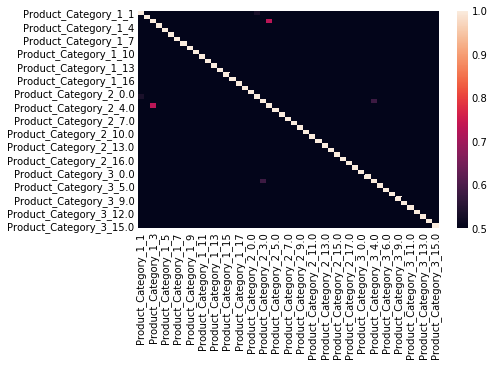

In [47]:
correlation_matrix = X.loc[:, :'Product_Category_3_15.0'].corr()
sns.heatmap(correlation_matrix, vmin=.5)

In [48]:
from matplotlib.mlab import PCA as mlabPCA 
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [50]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [51]:
X = StandardScaler().fit_transform(X)

In [52]:
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00000186 -0.12586268 -0.11526707 ... -0.018022   -0.01220115
  -0.02272963]
 [-0.12586268  1.00000186 -0.04186292 ...  0.00401549  0.00423023
  -0.00106971]
 [-0.11526707 -0.04186292  1.00000186 ... -0.01077429 -0.01859844
  -0.01509425]
 ...
 [-0.018022    0.00401549 -0.01077429 ...  1.00000186 -0.08243134
  -0.06044463]
 [-0.01220115  0.00423023 -0.01859844 ... -0.08243134  1.00000186
  -0.05517311]
 [-0.02272963 -0.00106971 -0.01509425 ... -0.06044463 -0.05517311
   1.00000186]]


In [53]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 69).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.36791534]
 [-0.12506786]
 [-0.12621009]
 [-0.05545914]
 [ 0.20061709]
 [-0.02364347]
 [ 0.04424538]
 [ 0.22338695]
 [ 0.00296863]
 [-0.00239806]
 [ 0.06947601]
 [ 0.03782048]
 [ 0.01755313]
 [ 0.02725733]
 [ 0.04219586]
 [ 0.07472414]
 [ 0.01721758]
 [ 0.04030431]
 [ 0.3422289 ]
 [-0.30856669]
 [-0.06809054]
 [-0.16726114]
 [-0.1333509 ]
 [-0.10192791]
 [ 0.01393879]
 [-0.03760807]
 [-0.01321645]
 [-0.02643031]
 [-0.02392173]
 [ 0.02043143]
 [-0.0137807 ]
 [ 0.08772158]
 [-0.05422975]
 [ 0.04864454]
 [ 0.0514599 ]
 [ 0.01701191]
 [ 0.47830386]
 [-0.03757461]
 [-0.05865962]
 [-0.17914481]
 [-0.09513293]
 [-0.13575853]
 [-0.13063364]
 [-0.03876316]
 [-0.05878163]
 [-0.09323564]
 [-0.06463909]
 [-0.08419308]
 [-0.21669223]
 [-0.14000421]
 [-0.06372958]
 [-0.05986839]
 [ 0.00198876]
 [ 0.01019643]
 [-0.0098515 ]
 [-0.00598766]
 [ 0.00150491]
 [ 0.0317469 ]
 [ 0.00823535]
 [-0.03924647]
 [ 0.08490266]
 [-0.08490266]
 [-0.01304862]
 [-0.02152795]
 [-0.0027775 ]
 [ 0.0027

Eigenvalue 46: 1.0708789530141127
----------------------------------------
Eigenvector 47: 
[[-0.01336032]
 [ 0.11538164]
 [-0.02974899]
 [-0.12976884]
 [ 0.03459393]
 [ 0.0554055 ]
 [-0.16892395]
 [-0.01169121]
 [-0.09437833]
 [ 0.05413323]
 [ 0.05178544]
 [ 0.0398328 ]
 [-0.14242041]
 [-0.04166646]
 [ 0.047712  ]
 [ 0.0625273 ]
 [-0.14415303]
 [-0.12757869]
 [ 0.00088924]
 [-0.03291685]
 [-0.0458372 ]
 [ 0.02758157]
 [ 0.05360433]
 [-0.00926539]
 [ 0.07635298]
 [ 0.02746282]
 [ 0.10543048]
 [-0.01810818]
 [-0.04252701]
 [-0.3537625 ]
 [ 0.06427201]
 [ 0.0570379 ]
 [-0.04953583]
 [-0.00278533]
 [ 0.06165934]
 [-0.05956521]
 [ 0.02958306]
 [-0.04102841]
 [-0.13925988]
 [ 0.1237651 ]
 [ 0.18141727]
 [ 0.04946581]
 [-0.10977316]
 [ 0.079241  ]
 [-0.17026506]
 [-0.16037161]
 [-0.03134924]
 [-0.06341848]
 [ 0.05119645]
 [-0.02813456]
 [-0.06035615]
 [ 0.13341503]
 [ 0.14831048]
 [ 0.069478  ]
 [-0.05642043]
 [-0.17649678]
 [ 0.01342812]
 [-0.19092028]
 [ 0.0663479 ]
 [ 0.11226965]
 [ 0.024

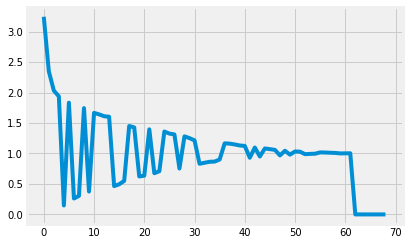

In [54]:
plt.plot(eig_val_cov)
plt.show()

In [55]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
pca.explained_variance_ratio_

array([0.04700805, 0.03404216, 0.02940785, 0.0280497 ])

In [57]:
X_pca = pca.fit_transform(X)

In [58]:
X_pca

array([[-0.81571499,  3.75871353,  0.32067271, -1.3051494 ],
       [ 2.19382735,  0.12351642,  3.34328042, -0.62835302],
       [-1.93475225,  1.38882056,  1.72037128, -0.91178215],
       ...,
       [-0.67040894, -0.70232598, -0.76959721, -0.39898477],
       [-1.52004355, -0.21892806, -0.5414869 ,  0.16137753],
       [-0.66328797, -0.39315449,  0.50868674,  0.69114222]])

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [60]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
y_pred = reg.predict(X_test)

In [175]:
y_pred

array([84.86984882, 98.62343003, 83.42860581, ..., 36.63954331,
       85.09218003, 86.31483628])

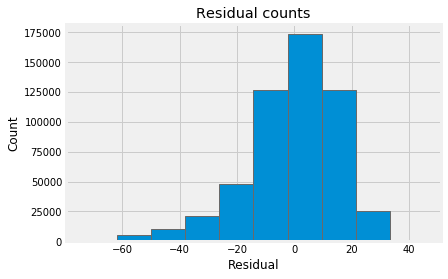

In [62]:
# Extract predicted values.
predicted = reg.predict(X).ravel()
actual = df1['Purchase']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

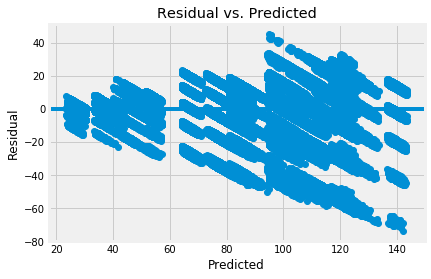

In [63]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [64]:
from sklearn.model_selection import cross_val_score
cross_val_score(reg, X, y, cv=10)

array([0.64317878, 0.64627064, 0.65022471, 0.64626459, 0.64956618,
       0.64830668, 0.64865249, 0.65200946, 0.64576153, 0.64495184])

In [65]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE : 245.6752881430658
RMSE : 15.6740322872918


In [66]:
reg.score(X_test,y_test)

0.6471251897905703

In [67]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.6471258249663876


In [173]:
reg.coef_

array([-8.79831180e+10, -4.12213936e+10, -3.80756625e+10, -2.91983582e+10,
       -9.00160219e+10, -3.82896923e+10, -1.66001125e+10, -8.18200984e+10,
       -5.57714318e+09, -1.94863361e+10, -4.15263611e+10, -1.69827595e+10,
       -2.02359689e+10, -1.06046912e+10, -2.15472336e+10, -2.66625385e+10,
       -6.43632241e+09, -1.51425508e+10, -1.82511410e+12, -1.12968778e+12,
       -2.87566407e+11, -8.36397892e+11, -8.43442003e+11, -6.78032262e+11,
       -1.30976997e+11, -1.27142688e+12, -3.97821166e+11, -2.94110533e+11,
       -6.25918147e+11, -3.90257535e+11, -5.43872559e+11, -1.18643907e+12,
       -1.00531905e+12, -1.06772767e+12, -6.09890039e+11, -2.79697260e+11,
       -4.19560178e+12, -3.06481026e+11, -5.37203606e+11, -1.57001269e+12,
       -8.54973327e+11, -1.37062648e+12, -1.31347305e+12, -5.15594564e+11,
       -5.27756377e+11, -1.17290244e+12, -9.01237179e+11, -1.64199098e+12,
       -2.00985493e+12, -2.15978388e+12, -1.56764072e+12, -8.37844622e+11,
       -3.69893576e+12, -

In [ ]:
import

# Random Forest

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
X = df1.drop(['Purchase', 'Product_ID', 'Marital_Status', 'Occupation', 'User_ID',], axis=1)
X = pd.get_dummies(data=X, columns=['Product_Category_1', 'Product_Category_2', 'Product_Category_3',
                                           'Stay_In_Current_City_Years', 'City_Category', 'Gender', 'Age'])
y = df1['Purchase']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [67]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
rfr = RandomForestRegressor(n_estimators=10)

In [69]:
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [70]:
from sklearn.model_selection import cross_val_score
cross_val_score(rfr, X, y, cv=5)

array([0.64196346, 0.64532758, 0.64450397, 0.64715215, 0.64232653])

In [71]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE : 249.34683376779878
RMSE : 15.790719862241835


In [72]:
rfr.score(X_test,y_test)

0.6418515785320035

In [73]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.6418526126404114


# Gradient Boosting

In [74]:
from sklearn.ensemble import GradientBoostingRegressor


In [75]:
X = df1.drop(['Purchase', 'Product_ID', 'Marital_Status', 'Occupation', 'User_ID',], axis=1)
X = pd.get_dummies(data=X, columns=['Product_Category_1', 'Product_Category_2', 'Product_Category_3',
                                           'Stay_In_Current_City_Years', 'City_Category', 'Gender', 'Age'])
y = df1['Purchase']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [77]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
gbr = GradientBoostingRegressor()

In [79]:
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

In [80]:
from sklearn.model_selection import cross_val_score
cross_val_score(gbr, X, y, cv=10)

array([0.63742516, 0.63973976, 0.64404591, 0.64013406, 0.64306002,
       0.64189489, 0.64196423, 0.64601502, 0.63961083, 0.63921392])

In [84]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE : 250.0566350868104
RMSE : 15.813179158120304


In [85]:
gbr.score(X_test,y_test)

0.6408320579785697

In [86]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.640832071307695


# SGD Regression

In [87]:
X = df1.drop(['Purchase', 'Product_ID', 'Marital_Status', 'Occupation', 'User_ID',], axis=1)
X = pd.get_dummies(data=X, columns=['Product_Category_1', 'Product_Category_2', 'Product_Category_3',
                                           'Stay_In_Current_City_Years', 'City_Category', 'Gender', 'Age'])
y = df1['Purchase']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [89]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [90]:
clf = linear_model.SGDRegressor(max_iter=1000, tol=1e-3)

In [91]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [92]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=10)

array([0.64223286, 0.64598715, 0.64963343, 0.64618049, 0.64934915,
       0.64802181, 0.64848803, 0.65184516, 0.64561782, 0.64471487])

In [93]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE : 246.80972207577506
RMSE : 15.710178932010134


In [94]:
clf.score(X_test,y_test)

0.6454957497206076

In [95]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.6455115516934374


# Logistic Regression

Hoping to do some more analysis here before I have my capstone interview.

In [69]:
df1 = pd.read_csv('BlackFriday.csv', low_memory=False)
print('Dataframe dimensions:', df1.shape)


Dataframe dimensions: (537577, 12)


In [70]:
#df1['Age']=(df1['Age'].str.strip('+'))
#df1['Stay_In_Current_City_Years']=(df1['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [71]:
df1 = df1.fillna(0)

In [68]:
#creating integer values for catagorical variables
#Could also do this with
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(df['Col1'])
#df['Col3'] = le.transform(df['Col3'])
#mapping1 = {k: v for v, k in enumerate(df1.Age.unique())}
#df1['Ageintval'] = df1.Age.map(mapping1)

In [69]:
df1['Product_ID'] = df1.Product_ID.str.replace('P','0')
df1['Gender'] = df1.Gender.str.replace('M','0')
df1['Gender'] = df1.Gender.str.replace('F','1')
df1['Gender']=df1['Gender'].astype(np.int64)

In [70]:
df1['Product_ID']=df1['Product_ID'].astype(np.int64)

In [71]:
df1.dtypes

User_ID                         int64
Product_ID                      int64
Gender                          int64
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [72]:
X = df1.drop(['City_Category', 'Marital_Status', 'User_ID', 'Gender'], axis=1)
X = pd.get_dummies(data=X, columns=['Product_Category_1', 'Product_Category_2', 'Product_Category_3','Age',
                                    'Occupation','Stay_In_Current_City_Years', ])
y = df1['Gender']

In [73]:
X.head()

,Product_ID,Purchase,Product_Category_1_1,Product_Category_1_2,Product_Category_1_3,Product_Category_1_4,Product_Category_1_5,Product_Category_1_6,Product_Category_1_7,Product_Category_1_8,Product_Category_1_9,Product_Category_1_10,Product_Category_1_11,Product_Category_1_12,Product_Category_1_13,Product_Category_1_14,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_2_0.0,Product_Category_2_2.0,Product_Category_2_3.0,Product_Category_2_4.0,Product_Category_2_5.0,...,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,Occupation_19,Occupation_20,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,69042,91.487704,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,248942,123.288280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,87842,37.709415,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,85442,32.511536,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,285442,89.269256,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [75]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [77]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [78]:
prediction = logmodel.predict(X_test)

In [79]:
from sklearn.model_selection import cross_val_score
cross_val_score(logmodel, X, y, cv=10)

array([0.75408311, 0.75408311, 0.75408311, 0.75408311, 0.75408311,
       0.75408311, 0.75408311, 0.75409714, 0.75409714, 0.75409714])

In [80]:
from sklearn.metrics import classification_report
classification_report(y_test, prediction, target_names=['0','1'])

'              precision    recall  f1-score   support\n\n           0       0.77      0.98      0.86    121872\n           1       0.66      0.09      0.17     39402\n\n   micro avg       0.77      0.77      0.77    161274\n   macro avg       0.72      0.54      0.52    161274\nweighted avg       0.74      0.77      0.69    161274\n'

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[119972,   1900],
       [ 35665,   3737]], dtype=int64)

In [82]:
pd.crosstab(y_test, prediction)

col_0,0,1
Gender,,
0,119972,1900
1,35665,3737


In [83]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE : 9046.046093163084
RMSE : 95.1107044089312


In [84]:
logmodel.score(X_test,y_test)

0.7670734278308965

In [85]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = -2454.180292628385


In [86]:
X.shape

(537577, 87)

In [91]:
y.value_counts()

0    405380
1    132197
Name: Gender, dtype: int64

In [88]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

selector = RFE(logmodel)
selector = selector.fit(X_train, y_train)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
0,Product_ID,1
34,Product_Category_2_15.0,1
36,Product_Category_2_17.0,1
37,Product_Category_2_18.0,1
85,Stay_In_Current_City_Years_3,1
49,Product_Category_3_14.0,1
50,Product_Category_3_15.0,1
52,Product_Category_3_17.0,1
54,Age_0-17,1
56,Age_26-35,1


In [115]:
df1 = pd.read_csv('BlackFriday.csv', low_memory=False)
print('Dataframe dimensions:', df1.shape)


Dataframe dimensions: (537577, 12)


In [116]:
#df1['Age']=(df1['Age'].str.strip('+'))
#df1['Stay_In_Current_City_Years']=(df1['Stay_In_Current_City_Years'].str.strip('+').astype('float'))

In [117]:
df1 = df1.fillna(0)

In [118]:
#creating integer values for catagorical variables
#Could also do this with
#from sklearn import preprocessing
#le = preprocessing.LabelEncoder()
#le.fit(df['Col1'])
#df['Col3'] = le.transform(df['Col3'])
#mapping1 = {k: v for v, k in enumerate(df1.Age.unique())}
#df1['Ageintval'] = df1.Age.map(mapping1)

In [119]:
df1['Product_ID'] = df1.Product_ID.str.replace('P','0')
df1['Gender'] = df1.Gender.str.replace('M','0')
df1['Gender'] = df1.Gender.str.replace('F','1')
df1['Gender']=df1['Gender'].astype(np.int64)

In [120]:
df1['Product_ID']=df1['Product_ID'].astype(np.int64)

In [121]:
df1.dtypes

User_ID                         int64
Product_ID                      int64
Gender                          int64
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [122]:
X = df1.drop(['City_Category', 'Product_ID', 'Marital_Status', 'User_ID', 'Occupation', 'Gender','Stay_In_Current_City_Years', 'City_Category', 'Age'], axis=1)
X = pd.get_dummies(data=X, columns=['Product_Category_1', 'Product_Category_2', 'Product_Category_3', ])
y = df1['Gender']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [124]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [125]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

In [126]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [127]:
prediction = logmodel.predict(X_test)

In [128]:
from sklearn.model_selection import cross_val_score
cross_val_score(logmodel, X, y, cv=10)

array([0.75408311, 0.75408311, 0.75408311, 0.75408311, 0.75408311,
       0.75408311, 0.75408311, 0.75409714, 0.75409714, 0.75409714])

In [129]:
from sklearn.metrics import classification_report
classification_report(y_test, prediction, target_names=['0','1'])

'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.86    121872\n           1       0.00      0.00      0.00     39402\n\n   micro avg       0.76      0.76      0.76    161274\n   macro avg       0.38      0.50      0.43    161274\nweighted avg       0.57      0.76      0.65    161274\n'

In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[121872,      0],
       [ 39402,      0]], dtype=int64)

In [131]:
y.value_counts()

0    405380
1    132197
Name: Gender, dtype: int64

In [132]:
pd.crosstab(y_test, prediction)

col_0,0
Gender,
0,121872
1,39402


In [133]:
from sklearn import metrics
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE : 9046.046093163084
RMSE : 95.1107044089312


In [134]:
logmodel.score(X_test,y_test)

0.7556828751069609

In [135]:
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = -2454.180292628385


In [136]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

selector = RFE(logmodel)
selector = selector.fit(X_train, y_train)
rankings = pd.DataFrame({'Features': X.columns, 'Ranking' : selector.ranking_})
rankings.sort_values('Ranking')

,Features,Ranking
26,Product_Category_2_8.0,1
29,Product_Category_2_11.0,1
22,Product_Category_2_4.0,1
32,Product_Category_2_14.0,1
33,Product_Category_2_15.0,1
35,Product_Category_2_17.0,1
18,Product_Category_1_18,1
17,Product_Category_1_17,1
36,Product_Category_2_18.0,1
15,Product_Category_1_15,1


In [ ]:
95**2

In [141]:
y.median()

0.0

In [142]:
df1.median()

User_ID               1003031.0
Product_ID             165842.0
Gender                      0.0
Occupation                  7.0
Marital_Status              0.0
Product_Category_1          5.0
Product_Category_2          5.0
Product_Category_3          0.0
Purchase                 8062.0
dtype: float64